In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler



In [68]:

df = pd.read_csv("cancer_prediction.csv")


In [70]:

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']



In [72]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [74]:

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [76]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [78]:

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=1)

In [79]:

best_rf = random_search.best_estimator_



In [80]:

y_pred = best_rf.predict(X_test)



In [81]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Model Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10


Confusion Matrix:
 [[5 2]
 [1 2]]


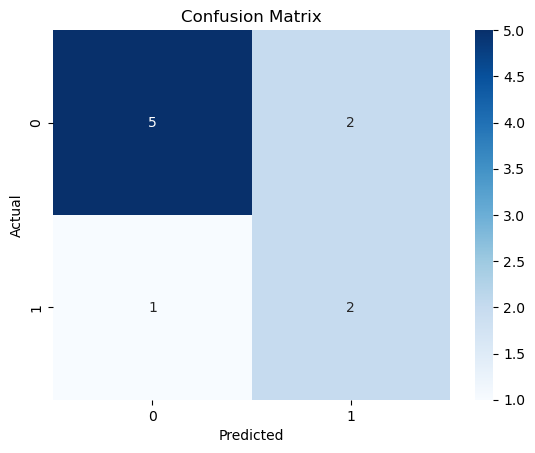

In [82]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [ ]:

print("\nEnter values for prediction:")
user_input = []
for feature in X.columns:
    value = float(input(f"Enter value for {feature}: "))
    user_input.append(value)




Enter values for prediction:


In [ ]:

user_input_df = pd.DataFrame([user_input], columns=X.columns)



In [ ]:

user_input_scaled = scaler.transform(user_input_df)



In [ ]:
probability = best_rf.predict_proba(user_input_scaled)[0][1] 
print(f"\nThe probability of having cancer is: {probability * 100:.2f}%")